In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

# **Question 1:**
Imagine you are an archaeologist analyzing the growth rings of ancient trees to estimate climate changes over centuries. The data points you collected represent tree ring widths at certain years. From previous studies, you know that only specific powers of time influence growth, so you want to build a polynomial using those particular powers while skipping the others.

> **Example Data Points:**
>
> * `data_x = np.array([1, 2, 3, 4])`
> * `data_y = np.array([6, 11, 18, 26])`
> * `powers = np.array([0, 2, 3, 6])`

**(a)** **[4 Marks]** Now, your task is to  write a function called `get_poly_custom_powers(data_x, data_y, powers)`.

**Function Description:**

* The function will create a modified Vandermonde matrix using only the powers given in the `powers` list instead of the increasing order of power in a Polynomial.
* Then, find the coefficients of the polynomial using this matrix.
* Finally, return a NumPy Polynomial object that includes all powers from 0 up to the highest one in the list.
* For any missing powers, set the corresponding coefficient to 0.
* You may use NumPy’s Polynomial class to create and evaluate the polynomial.

Hint: A polynomial $a_0x^0+a_1x^1+a_2x^2+a_3x^3$ should now become $a_0x^0+0*x^1+a_1x^2+a_2x^3+0*x^4+0*x^5+a_3x^6$ according to the given powers.
Remember you cannot hardcode, it should work for any list of power.

**(b)** **[2 Marks]** Using the polynomial from part (a), find the value of the polynomial at $x=5$ and print all the coefficients of the full polynomial (including zeros for any missing powers) in increasing order of power.


In [2]:
def get_poly_custom_powers(data_x, data_y, powers):
  n = len(data_x)
  matrix = np.zeros(shape=(n, n))
  for i in range(n):
    for j in range(n):
        matrix[i][j] = (data_x[i]**powers[j])

  x_inv = np.linalg.inv(matrix)
  coeff = np.dot(x_inv, data_y)
  new_coeff = np.zeros(max(powers)+1)
  for i in range(len(coeff)):
    new_coeff[powers[i]] = coeff[i]
  return new_coeff

data_x = np.array([1, 2, 3, 4])
data_y = np.array([6, 11, 18, 26])
powers = np.array([0, 2, 3, 6])
result = get_poly_custom_powers(data_x, data_y, powers)

p = Polynomial(result)
print(p)


x = 5
ans = p(x)
print(f"Value of the Polynomial at x=5 is =",ans)
print(f"coeff in increasing power:", np.sort(result))

4.08637874 + 0.0·x + 2.0996124·x² - 0.18604651·x³ + 0.0·x⁴ + 0.0·x⁵ +
(5.53709856e-05)·x⁶
Value of the Polynomial at x=5 is = 34.18604651162805
coeff in increasing power: [-1.86046512e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  5.53709856e-05  2.09961240e+00  4.08637874e+00]


# **Question 2:**

In [3]:
class Lagrange_Polynomial:
    def __init__(self, data_x, data_y):
        '''
        First we need to check whether the input vectors (numpy arrays) are equal
        or not.
        assert (condition), "msg"
        this command checks if the condition is true or false. If true, the code
        runs normally. But if false, then the code returns an error message "msg"
        and stops execution
        '''
        assert len(data_x) == len(data_y), "length of data_x and data_y must be equal"

        '''
        Lagrange polynomials do not use coefficeints a_i, rather the nodes
        (x_i, y_i). Hence, we just need to store these inside the object
        '''

        self.data_x = data_x
        self.data_y = data_y

        self.degree = len(data_x) - 1
        # we assume that the inputs are numpy array, so we can perform
        # element wise operations

    def __repr__(self):
        # method for string representation
        strL = f"LagrangePolynomial of order {self.degree}\n"
        strL += "p(x) = "
        for i in range(len(self.data_y)):
            if self.data_y[i] == 0:
                continue
            elif self.data_y[i] >= 0:
                strL += f"+ {self.data_y[i]}*l_{i}(x) "
            else:
                strL += f"- {-self.data_y[i]}*l_{i}(x) "

        return strL

    def l(self, k, x):

        l_k = 1.0 # Initialization
        #Write your code here
        for i in range(len(self.data_x)):
          if i==k:
            continue
          else:
            l_k *= (x-self.data_x[k])/(self.data_x[k]-self.data_x[i])



        return l_k


    def __call__(self, x_arr):
        #Write your code here
        p_x_arr = np.zeros(len(x_arr))

        for i in range(len(x_arr)):
          for j in range(len(self.data_x)):
            p_x_arr += self.l(j, x_arr[i])*self.data_y[j]

        return p_x_arr

Complete the Lagrange Polynomial class and find the answer to the follwing tasks

Q1. Construct a polynomial of minimum degree that passes through the following points using Lagrange interpolation: [ Marks: 1 ]

( -8, -132 ), ( -4, 168 ), ( 0, 84 ) and ( 4, 0 ).

\\

Q2. Create a new Lagrange interpolating polynomial by adding the following two points to the original dataset: [ Marks: 1 ]

( −2, 100 ) and ( 2, 20 )

\\


Q3. Plot both polynomials from Q1 and Q2 on the same graph using a domain of

[ −20, 20 ], with at least 1000 samples for each curve.

Also:

1) Plot the original 4 data points as red dots. [ Marks: 1.5 ]

2) Plot the new points from Q2 and point them as green star. [ Marks: 1.5 ]

Include proper legends, labels, and a title.

In [4]:
data_x = np.array([-8, -4, 0, 4])
data_y = np.array([-132, 168, 84, 0])
p = Lagrange_Polynomial(data_x, data_y)
print(p)

LagrangePolynomial of order 3
p(x) = - 132*l_0(x) + 168*l_1(x) + 84*l_2(x) 


In [5]:
data_x1 = np.array([-8, -4, 0, 4, -2, 2])
data_y1 = np.array([-132, 168, 84, 0, 100, 20])
p1 = Lagrange_Polynomial(data_x1, data_y1)
print(p1)

LagrangePolynomial of order 5
p(x) = - 132*l_0(x) + 168*l_1(x) + 84*l_2(x) + 100*l_4(x) + 20*l_5(x) 


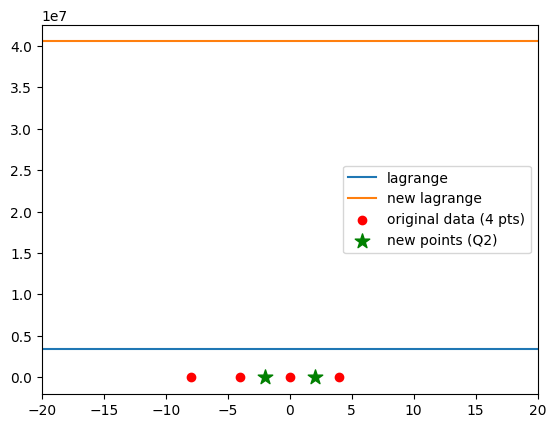

In [21]:
fig, ax = plt.subplots()
x_sample_arr = np.linspace(-20, 20, 1000)
p2 = p(x_sample_arr)
p3 = p1(x_sample_arr)
ax.plot(x_sample_arr, p2, label="lagrange")
ax.plot(x_sample_arr, p3, label="new lagrange")

ax.scatter(data_x, data_y, color='red', marker='o', label='original data (4 pts)')
new_x = np.array([-2, 2])
new_y = np.array([100, 20])
ax.scatter(new_x, new_y, color='green', marker='*', s=120, label='new points (Q2)')


ax.set_xlim(-20, 20)
ax.legend();

# **Question 3:**
# **Question 3:**

Let, $$f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + x + 2$$

a. Using Richardson's Extrapolation, what is the slope of $f(x)$  at $x=0,−2.18625$ and step size = 0.1? [ Marks: 1 ]

b. Compare the error of your method with  actual, forward, backward and central differentiation at  $x=0,−2.18625$ [ Marks: 6 ]

c. Plot actual derivative, Forward derivative, Backward derivative, Central derivative and the derivative using Richardson's Extrapolation in a graph. [ Marks: 2 ]

\\
Here, $$h = 0.1$$

In [23]:
def forward_diff(f, h, x):
  return (f(x+h)-f(x))/h
def backward_diff(f, h, x):
  return (f(x)-f(x-h))/h
def central_diff(f, h, x):
  return (f(x+h)-f(x-h))/(2*h)


def dh(f, h, x):
  return central_diff(f, h, x)

def dh1(f, h, x):
  return (((4*(dh(f, h/2, x)))-dh(f, h, x))/3)

p = Polynomial(np.array([2, 1, -6, -2, 2.5, 1]))
ans1 = dh1(p, 0.1, 0)
ans2 = dh1(p, 0.1, -2.18625)
print(f"for x=0, {ans1}")
print(f"for x=-2.18625, {ans2}")

def error(f, f_prime, x):
  f_error = []
  b_error = []
  c_error = []

  for i in x:
    f_error_hi = forward_diff(f, 0.1, i)-f_prime(i)
    f_error.append(f_error_hi)
    b_error_hi = backward_diff(f, 0.1, i)-f_prime(i)
    b_error.append(b_error_hi)
    c_error_hi = central_diff(f, 0.1, i)-f_prime(i)
    c_error.append(c_error_hi)

  return f_error, b_error, c_error

f = p
f_prime = f.deriv(1)
e1 = error(f, f_prime, [0, -2.18625])
print("forward error", e1[0])
print("backward error", e1[1])
print("central error", e1[2])


for x=0, 0.9999750000000011
for x=-2.18625, 8.288026167004322
forward error [np.float64(-0.6173999999999982), np.float64(-2.3372989628906566)]
backward error [np.float64(0.5776000000000012), np.float64(2.816186775390676)]
central error [np.float64(-0.019899999999998474), np.float64(0.23944390625000977)]


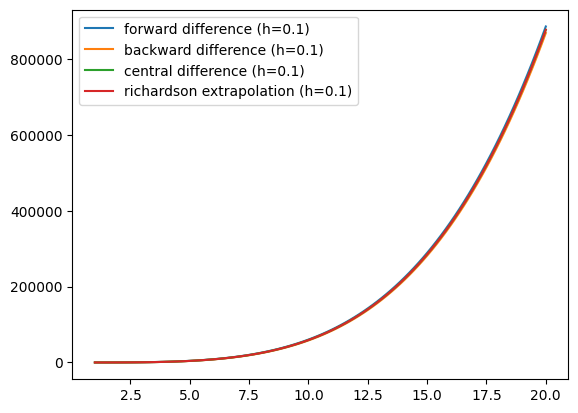

In [26]:
fig, ax = plt.subplots()

f = Polynomial(np.array([2, 1, -6, -2, 2.5, 1]))
f_prime = f.deriv(1)

x_data = np.linspace(1, 20, 100)

y1 = forward_diff(f, 0.1, x_data)
y2 = backward_diff(f, 0.1, x_data)
y3 = central_diff(f, 0.1, x_data)
y4 = dh1(f, 0.1, x_data)

ax.plot(x_data, y1, label="forward difference (h=0.1)")
ax.plot(x_data, y2, label="backward difference (h=0.1)")
ax.plot(x_data, y3, label="central difference (h=0.1)")
ax.plot(x_data, y4, label="richardson extrapolation (h=0.1)")
ax.legend();